In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("data.csv")
defaulter_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (569, 32)


In [5]:
print("Target variable frequency distribution : \n", defaulter_df["diagnosis"].value_counts())

Target variable frequency distribution : 
 B    357
M    212
Name: diagnosis, dtype: int64


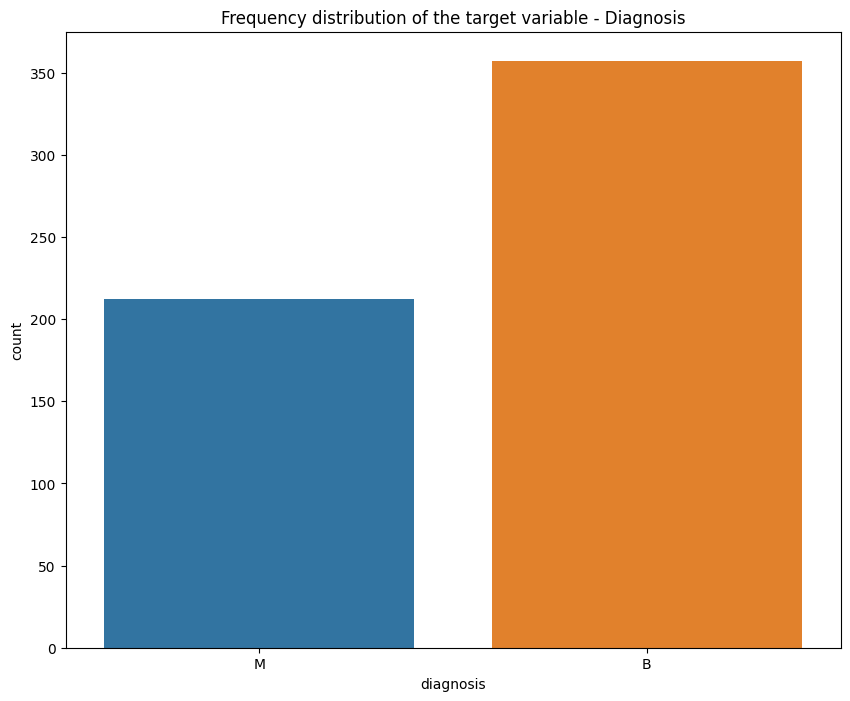

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(data=defaulter_df, x="diagnosis")
plt.title("Frequency distribution of the target variable - Diagnosis")
plt.show()

In [7]:
X = defaulter_df[["radius_mean", "perimeter_mean"]]
y = defaulter_df["diagnosis"]

# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  455
Size of test data :  114


# Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed


array([[ 2.34046721e-01,  2.35951060e-01],
       [ 5.50908468e-01,  5.38341158e-01],
       [ 3.80478966e-01,  3.82557974e-01],
       [ 2.30618542e-01,  2.38654147e-01],
       [ 1.88500906e-01,  1.90140845e-01],
       [ 6.32205299e-01,  6.55712050e-01],
       [ 7.01258632e-01,  7.06217101e-01],
       [ 4.83814095e-01,  4.77166026e-01],
       [ 2.76654097e-01,  2.74363352e-01],
       [ 3.04079534e-01,  2.92004553e-01],
       [ 2.70287477e-01,  2.57362356e-01],
       [ 4.45124639e-01,  4.36619718e-01],
       [ 3.56481708e-01,  3.38454972e-01],
       [ 4.19658162e-01,  4.23815621e-01],
       [ 2.27680102e-01,  2.20657277e-01],
       [ 5.58744307e-01,  5.77464789e-01],
       [ 3.48645869e-01,  3.32479727e-01],
       [ 1.20916793e-01,  1.19576042e-01],
       [-3.47715363e-02, -2.93782899e-02],
       [ 6.29756599e-01,  6.39351259e-01],
       [ 2.99182134e-01,  3.02390098e-01],
       [ 2.15926343e-01,  2.14468630e-01],
       [ 6.81669034e-01,  6.86299616e-01],
       [ 1.

In [13]:
X_train["radius_mean_normalized"] = train_transformed[:,0]
X_train["perimeter_mean_normalized"] = train_transformed[:,1]
X_train.head()

,radius_mean,perimeter_mean,radius_mean_normalized,perimeter_mean_normalized
68,9.029,58.79,0.065527,0.077323
181,21.090,142.70,0.656203,0.674207
63,9.173,59.20,0.072579,0.080239
248,10.650,68.01,0.144914,0.142908
60,10.170,64.55,0.121407,0.118296


In [14]:
X_test["radius_mean_normalized"] = transformed[:,0]
X_test["perimeter_mean_normalized"] = transformed[:,1]
X_test.head()

,radius_mean,perimeter_mean,radius_mean_normalized,perimeter_mean_normalized
204,12.47,81.09,0.234047,0.235951
70,18.94,123.60,0.550908,0.538341
131,15.46,101.70,0.380479,0.382558
431,12.40,81.47,0.230619,0.238654
540,11.54,74.65,0.188501,0.190141


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["radius_mean","perimeter_mean"]], y_train)
predictions = knn.predict(X_test[["radius_mean","perimeter_mean"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9210526315789473

In [18]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["radius_mean_normalized","perimeter_mean_normalized"]], y_train)
predictions = knn.predict(X_test[["radius_mean_normalized","perimeter_mean_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9473684210526315

In [19]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [20]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["B","M"], index = ["B","M"])

,B,M
B,69,2
M,4,39


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Sampling Techniques to handle imbalanced Dataset

## 1. UnderSampling (downsampling)

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
print("Before undersampling: \n", y_train.value_counts())

Before undersampling: 
 B    286
M    169
Name: diagnosis, dtype: int64


In [24]:
under_sampling = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_train_under, y_train_under  = under_sampling.fit_resample(X_train, y_train)

In [25]:
print("After undersampling: \n", y_train_under.value_counts())

After undersampling: 
 B    169
M    169
Name: diagnosis, dtype: int64


In [26]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_under[["radius_mean_normalized","perimeter_mean_normalized"]], y_train_under)
predictions = knn.predict(X_test[["radius_mean_normalized","perimeter_mean_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9298245614035088

In [27]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["B","M"], index = ["B","M"])

,B,M
B,66,5
M,3,40


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.96      0.93      0.94        71
           M       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## 2. OverSampling(Up Sampling)

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
print("Before oversampling: \n", y_train.value_counts())

Before oversampling: 
 B    286
M    169
Name: diagnosis, dtype: int64


In [31]:
over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over  = over_sampling.fit_resample(X_train, y_train)

In [32]:
print("After oversampling: \n", y_train_over.value_counts())

After oversampling: 
 B    286
M    286
Name: diagnosis, dtype: int64


In [33]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_over[["radius_mean_normalized","perimeter_mean_normalized"]], y_train_over)
predictions = knn.predict(X_test[["radius_mean_normalized","perimeter_mean_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9035087719298246

In [34]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["B","M"], index = ["B","M"])

,B,M
B,62,9
M,2,41


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.97      0.87      0.92        71
           M       0.82      0.95      0.88        43

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



## 3. SMOTE (Synthetic Minority Oversampling Technique)

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
print("Before SMOTE: \n", y_train.value_counts())

Before SMOTE: 
 B    286
M    169
Name: diagnosis, dtype: int64


In [38]:
smote = SMOTE()
X_train_smote, y_train_smote  = smote.fit_resample(X_train, y_train)

In [39]:
print("After SMOTE: \n", y_train_smote.value_counts())

After SMOTE: 
 B    286
M    286
Name: diagnosis, dtype: int64


In [40]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_smote[["radius_mean_normalized","perimeter_mean_normalized"]], y_train_smote)
predictions = knn.predict(X_test[["radius_mean_normalized","perimeter_mean_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9385964912280702

In [42]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["B","M"], index = ["B","M"])

,B,M
B,64,7
M,0,43


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       1.00      0.90      0.95        71
           M       0.86      1.00      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_clf = LogisticRegression()
log_clf.fit(X_train[["radius_mean_normalized","perimeter_mean_normalized"]], y_train)
predictions = log_clf.predict(X_test[["radius_mean_normalized","perimeter_mean_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9298245614035088

In [46]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["B","M"], index = ["B","M"])

,B,M
B,71,0
M,8,35


In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.90      1.00      0.95        71
           M       1.00      0.81      0.90        43

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



In [48]:
log_clf_balanced = LogisticRegression(class_weight = "balanced")
log_clf_balanced.fit(X_train[["radius_mean_normalized","perimeter_mean_normalized"]], y_train)
predictions = log_clf_balanced.predict(X_test[["radius_mean_normalized","perimeter_mean_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9035087719298246

In [49]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["B","M"], index = ["B","M"])

,B,M
B,66,5
M,6,37


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.92      0.93      0.92        71
           M       0.88      0.86      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

